In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
data = {
    'Height': [170, 160, 175, 180, 162, 155, 165, 158, 178, 185, 170, 172, 166, 168, 174, 160, 180, 165, 159, 182],
    'Weight': [70, 55, 80, 85, 60, 50, 65, 54, 75, 90, 72, 74, 63, 66, 78, 58, 83, 67, 53, 88],
    'ShoeSize': [42, 37, 44, 46, 38, 36, 39, 35, 43, 47, 41, 42, 40, 38, 44, 37, 45, 40, 36, 46],
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male']
}
df = pd.DataFrame(data)
df.head()

,Height,Weight,ShoeSize,Gender
0,170,70,42,Male
1,160,55,37,Female
2,175,80,44,Male
3,180,85,46,Male
4,162,60,38,Female


In [3]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [5]:
#Split data
X = df[['Height','Weight','ShoeSize']]
y = df['Gender']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

In [10]:
y_pred = model.predict(X_test)

/Users/adarshbadjate/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


accuracy_score:  0.25
Classification report:                precision    recall  f1-score   support

      Female       0.00      0.00      0.00         3
        Male       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



/Users/adarshbadjate/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adarshbadjate/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adarshbadjate/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


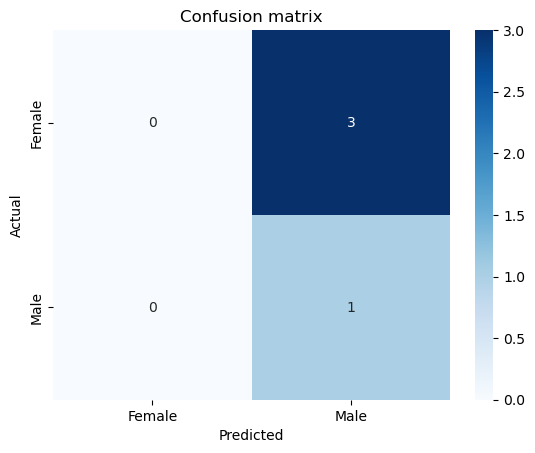

In [11]:
accuracy = accuracy_score(y_test,y_pred)
print("accuracy_score: ",accuracy)
report = classification_report(y_test,y_pred, target_names=['Female','Male'])
print("Classification report: ", report)
#confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Female','Male'], yticklabels=['Female','Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [19]:
new_data = np.array([[160, 100, 42]])
new_data_scaled = scaler.transform(new_data)
pred = model.predict(new_data_scaled)
if pred == [0]:
    print('Female')
elif pred == [1]:
    print('Male')


Male


/Users/adarshbadjate/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
